In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

## <u>Data Understanding & Cleaning</u>

- **Dropping unnecessary Columns**
- **Dropping / Filling NULL values**
- **Seprate Year and Month from data columns**
- **Detecting Outliers**
- **Remove Outliers**

In [2]:
# Reading the dataset

df = pd.read_csv('loan.csv')
df.head()

C:\Users\Ruchir.Dhingra\AppData\Local\Temp\ipykernel_26840\886025146.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(39717, 111)

Total rows being 39717 and 111 columns <br><br>

In [4]:
# Checking null values in a column

df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
#Finding columns where in all rows have NaN values and dropping them

All_Null_Columns = [x for x in df.columns if df[x].isnull().sum() == df.shape[0]]
df.drop(All_Null_Columns, axis=1, inplace=True)

In [6]:
print(len(All_Null_Columns), 'columns deleted that had all null values')

54 columns deleted that had all null values


In [7]:
# Getting percentage of null values per column
df.isnull().mean()*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [8]:
# As per analysing the data with relevant meaning of columns it seems that column mths_since_last_record is not having much relevance in data, thus, deleting column

df.drop('mths_since_last_record',axis=1,inplace=True)
df.shape

(39717, 56)

In [9]:
# Would drop all columns having only one unique value

unique_cols_count = df.nunique()
df.drop(unique_cols_count[unique_cols_count == 1].index, axis =1, inplace = True)

In [10]:
df.shape

(39717, 47)

In [11]:
# Analysing all columns having less than 10 unique items
unique_cols_count = df.nunique()
unique_cols_count[unique_cols_count <= 10]

term                    2
grade                   7
home_ownership          5
verification_status     3
loan_status             3
inq_last_6mths          9
pub_rec                 5
next_pymnt_d            2
pub_rec_bankruptcies    3
dtype: int64

- <font color='red'>**next_pymnt_d (2)**</font> : Shows the next payment date, which is only available for credits that have current status, and the loans that are already settled or charged off have no next payment date, thus, the pupose of this column can be achieved by Status column, therefore dropping this column.


In [12]:
df.drop('next_pymnt_d', axis=1, inplace = True)

<br>

- Dropping Behaviour based columns, as the problem statement is to find if the borrower could repay the loan or not at the time of him applying for loan, and some of the columns in dataset given would be created after some time of giving out loan, so, these columns won't be available at the time of borrower applying for loan.

In [13]:
behaviour_cols = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','issue_d']

df.drop(behaviour_cols, axis = 1, inplace = True)

In [14]:
# dropping off text columns which don't hold relevant data

df.drop(['emp_title','url','desc','title','zip_code'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      39717 non-null  int64  
 1   member_id               39717 non-null  int64  
 2   loan_amnt               39717 non-null  int64  
 3   funded_amnt             39717 non-null  int64  
 4   funded_amnt_inv         39717 non-null  float64
 5   term                    39717 non-null  object 
 6   int_rate                39717 non-null  object 
 7   installment             39717 non-null  float64
 8   grade                   39717 non-null  object 
 9   sub_grade               39717 non-null  object 
 10  emp_length              38642 non-null  object 
 11  home_ownership          39717 non-null  object 
 12  annual_inc              39717 non-null  float64
 13  verification_status     39717 non-null  object 
 14  loan_status             39717 non-null

In [16]:
# Since int_rate has data type as Object, thus, have to convert it to float as percentages

df.int_rate.replace('%','',regex=True,inplace=True)
df.int_rate = df.int_rate.astype('float')

<br>

- Segregating columns into Continuous, Categorical & Extra Columns

In [17]:
con_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','mths_since_last_delinq','pub_rec_bankruptcies']
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state','loan_status']
extra_cols = ['id','member_id']

In [18]:
df.shape

(39717, 20)

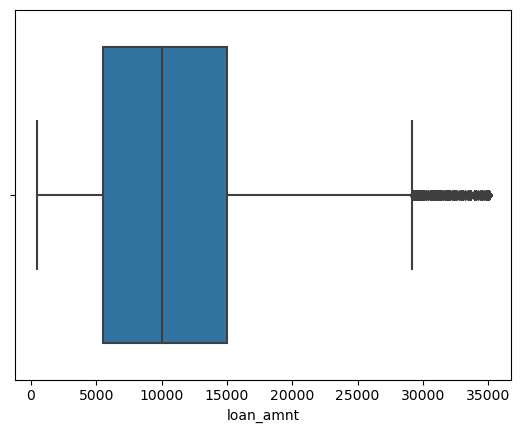

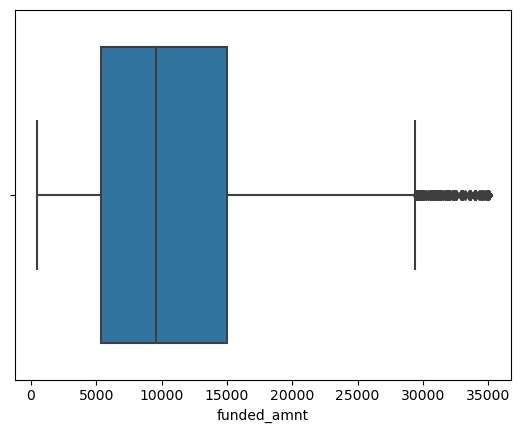

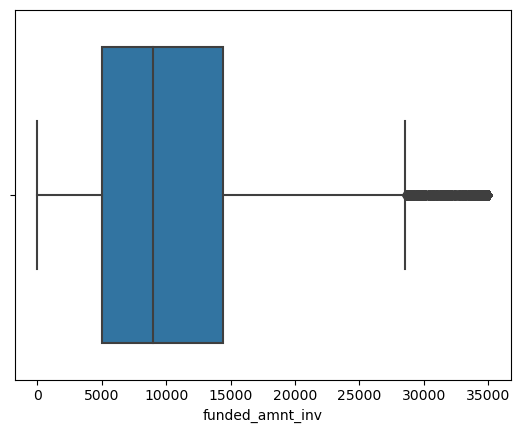

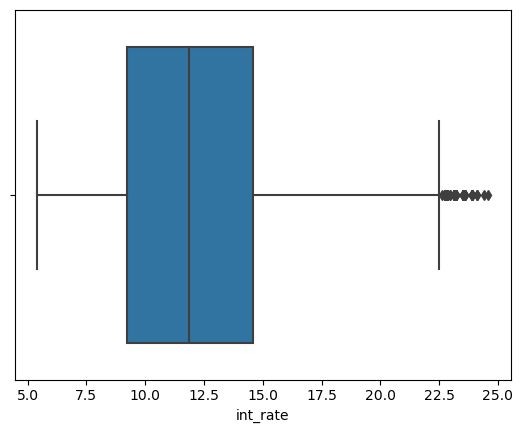

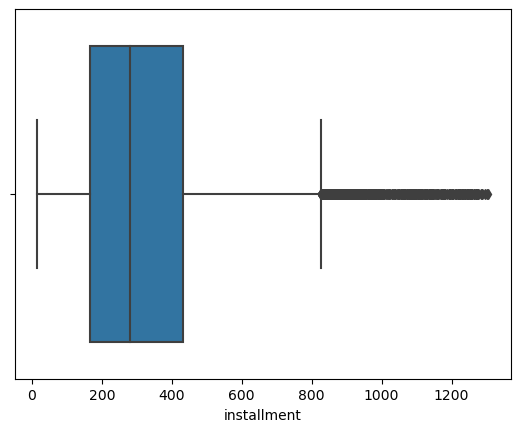

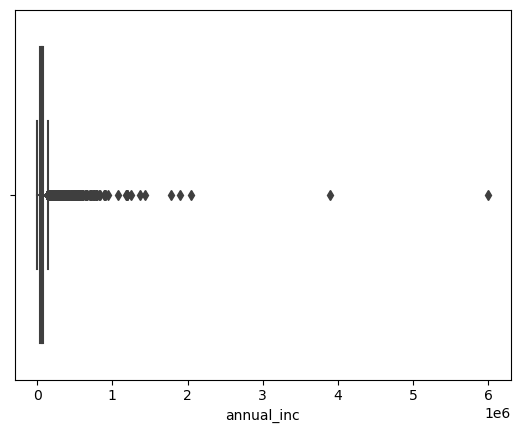

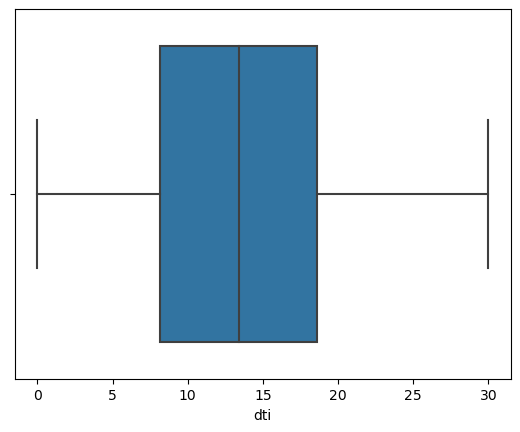

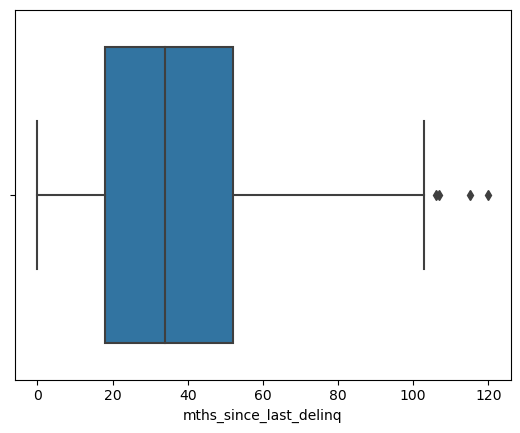

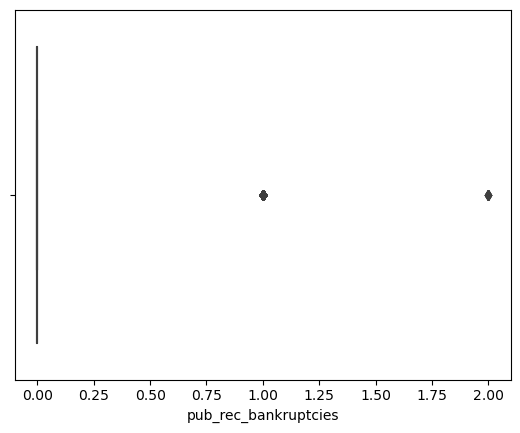

In [19]:
# Checking boxplots for all columns to check from which column outliers are to be removed.

for i in con_cols:
    sns.boxplot(x = df[i])
    plt.show()

In [20]:
# Outliers removal via annual_inc column to data upto 95 percentile only

df = df[df['annual_inc'] < df['annual_inc'].quantile(0.95)]

In [21]:
df.shape

(37730, 20)

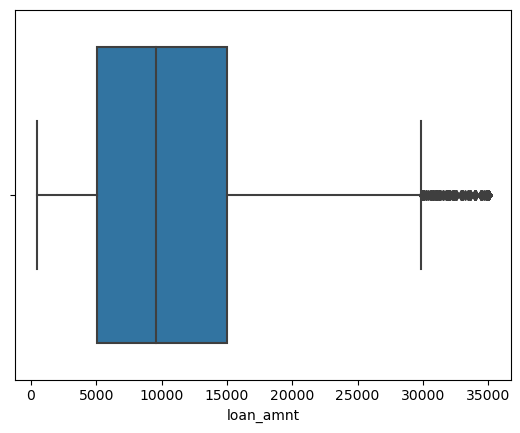

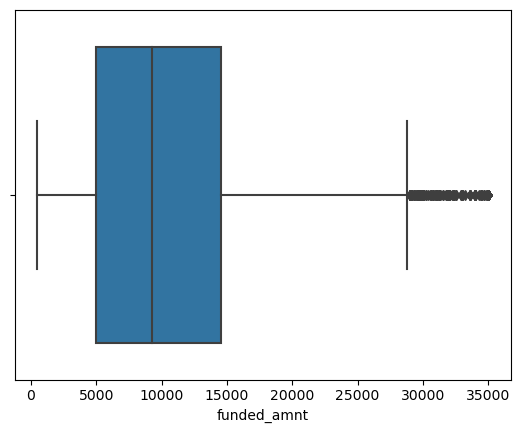

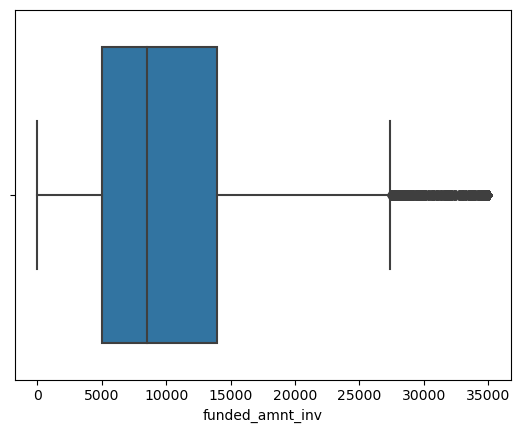

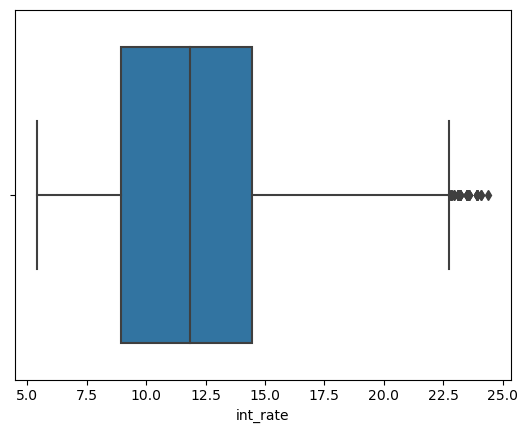

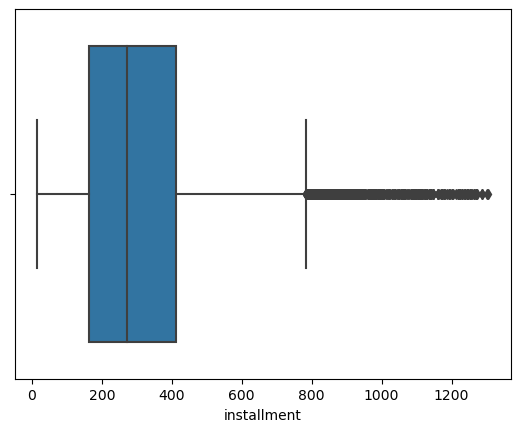

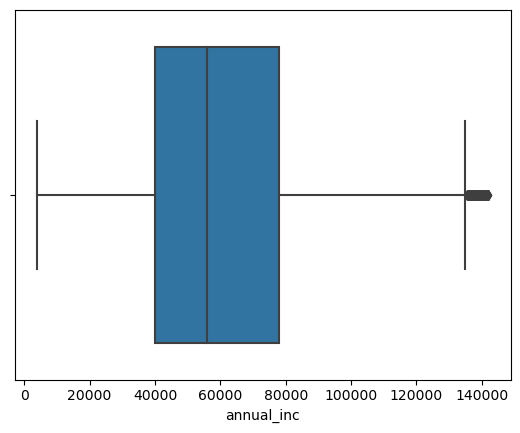

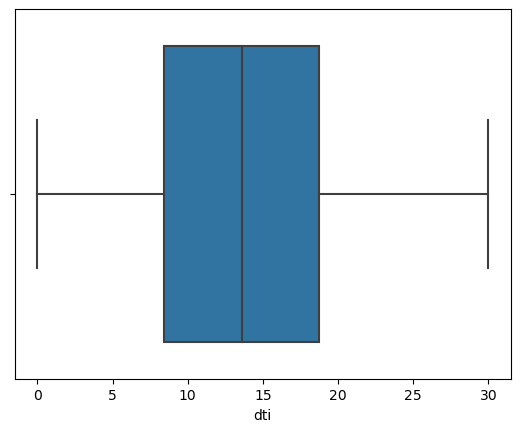

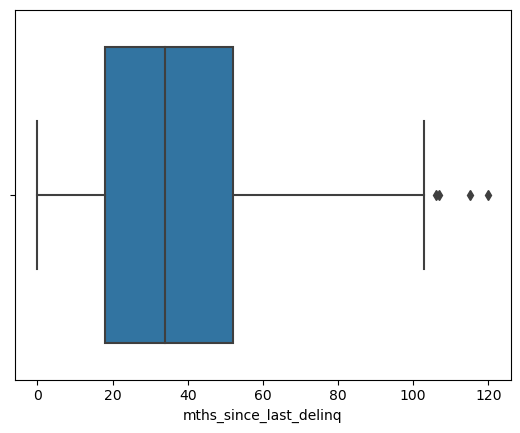

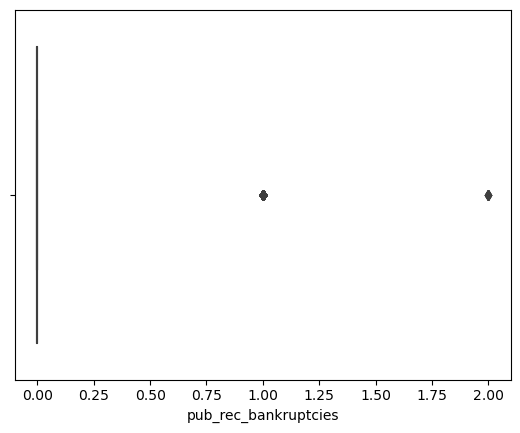

In [22]:
for i in con_cols:
    sns.boxplot(x = df[i])
    plt.show()
    

#### Now, the data seems good to analyse after cleaning irrelevant columns and outliers removal

<br>

## <u>Data Analysis</u>

> Now, let us focus on our target variable for the problem statement, ie, 'loan_status' column, as this column helps know who applicants have fully paid the loan or defaulted the loan.

<Axes: xlabel='loan_status', ylabel='Count'>

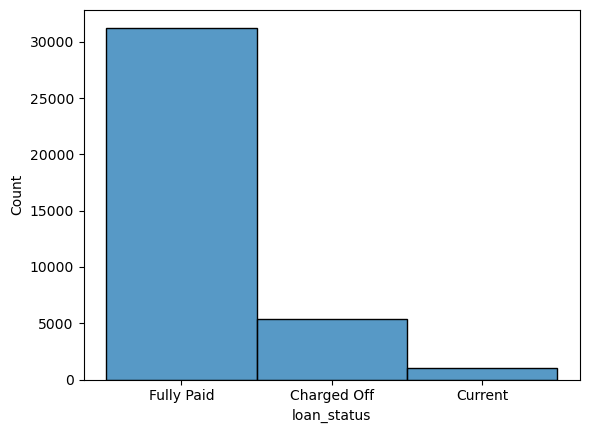

In [23]:
sns.histplot(df['loan_status'])

*In loan_status the applicants having 'Current' status neiher have paid the loan yet, neither did they defaulted on it, thus, we won't be analysing for these applicants and will get rid of them from our data.*

In [24]:
df = df[df['loan_status'] != 'Current']

In [25]:
df.shape

(36676, 20)

### <u>Univariate Analysis on Continuous Columns</u>

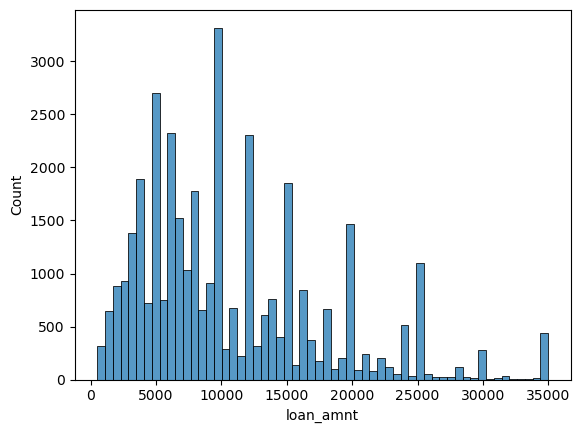

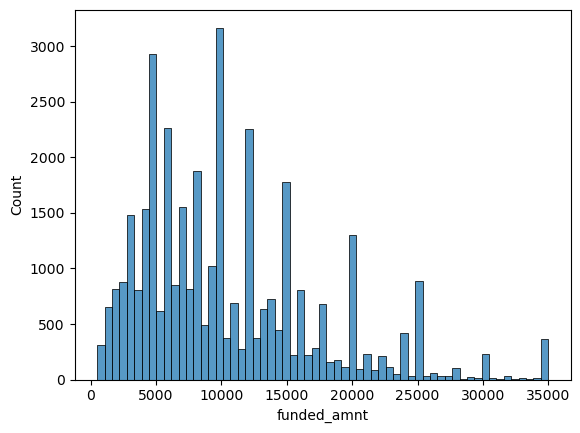

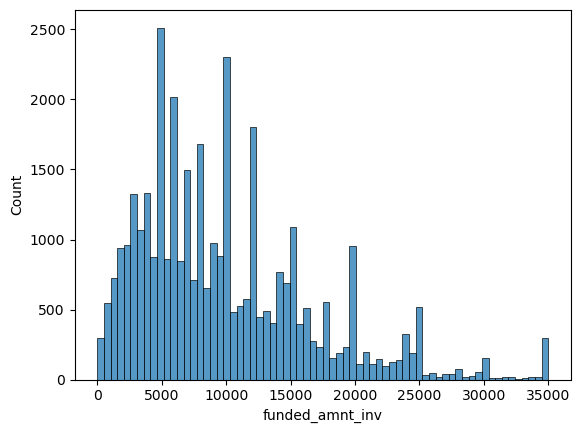

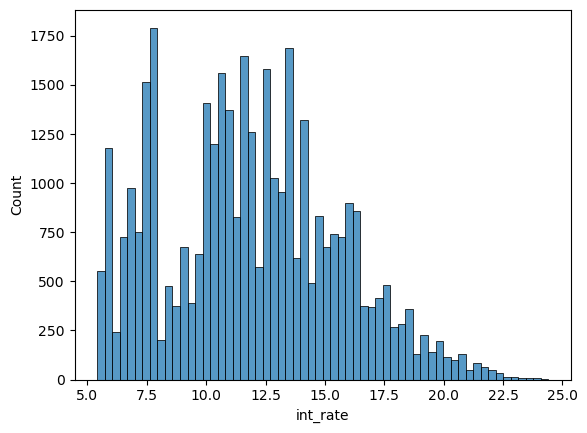

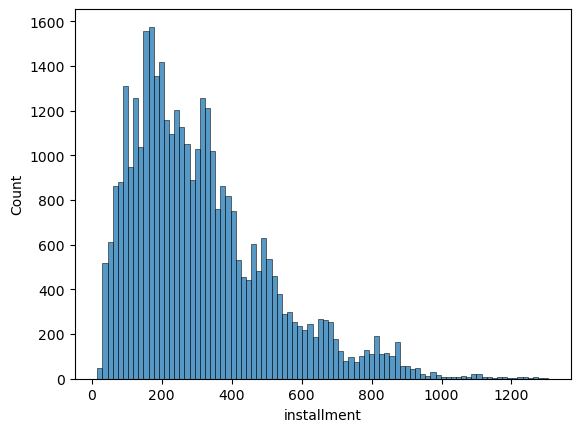

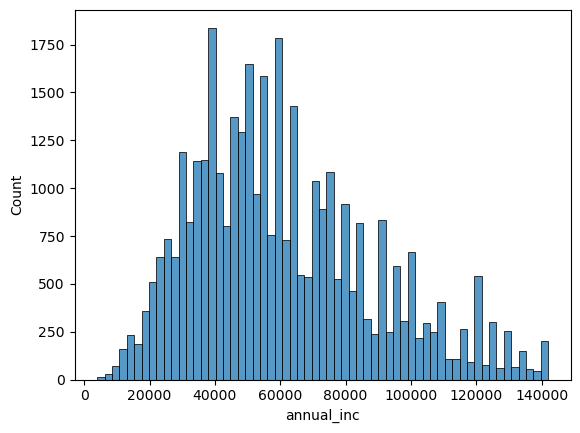

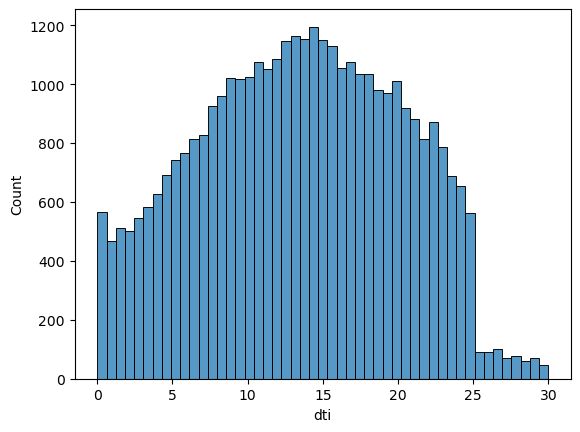

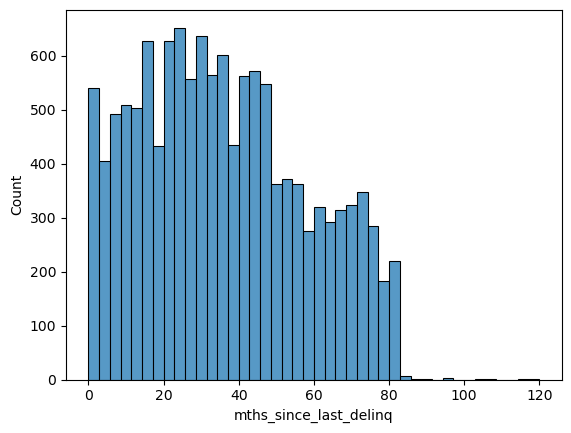

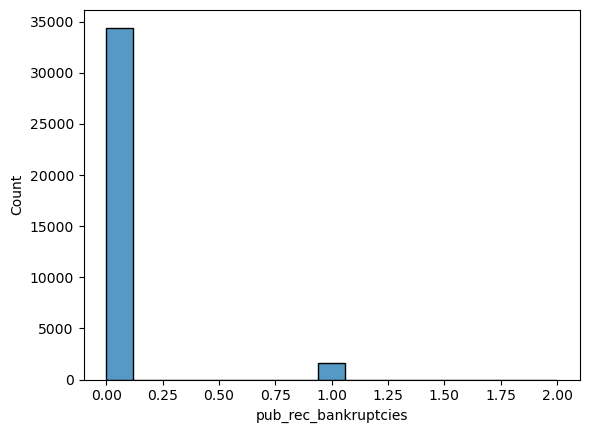

In [26]:
# Draw histogram for all Continuous Columns

for i in con_cols:
    sns.histplot(df[i])
    plt.show()

- **Loan amount has spikes in multiples of 5000, ie, people prefer taking loan in multiple of 5000's**<br>
- **Majority of applicants had around 100-250 Rs as monthly installment**<br>
- **Majority of applicants had annual income ranging from 40000-65000 installments**<br>

<br>

### <u>Univariate Analysis  on Categorical Columns</u>

In [27]:
# Assigning order to a few columns to get chart with increasing ordinal value order

df.emp_length = pd.Categorical(df.emp_length, categories = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'], ordered = True)
df.grade = pd.Categorical(df.grade, categories = ['A','B','C','D','E','F','G'], ordered = True)
df.sub_grade = pd.Categorical(df.sub_grade, categories = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'], ordered = True)

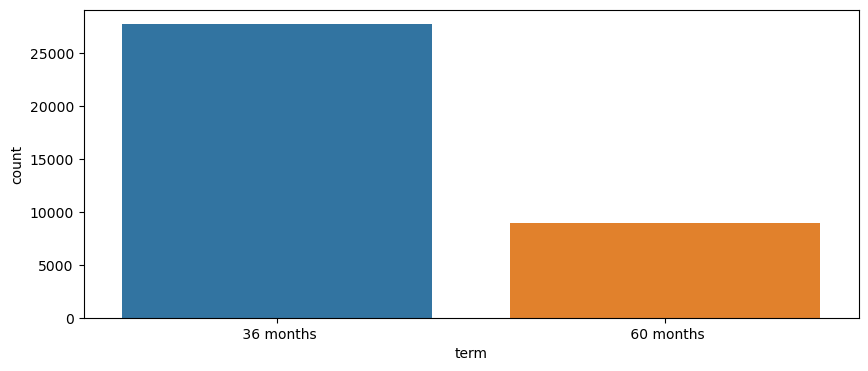

 36 months    27739
 60 months     8937
Name: term, dtype: int64


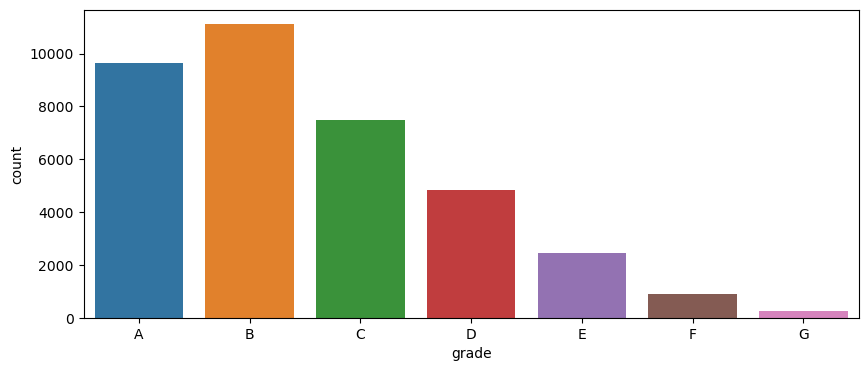

B    11105
A     9654
C     7484
D     4837
E     2448
F      886
G      262
Name: grade, dtype: int64


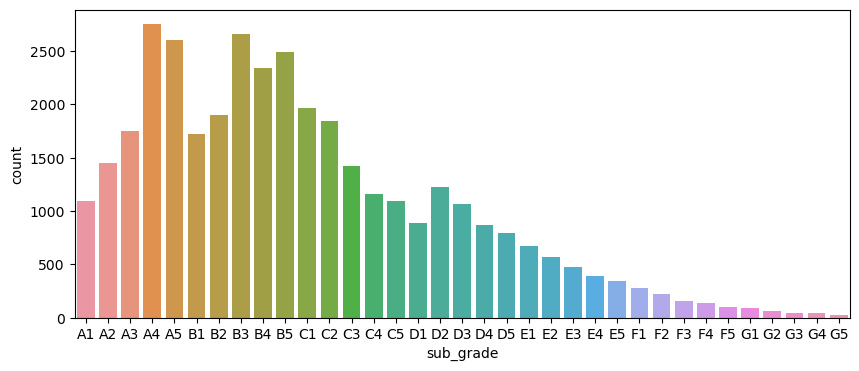

A4    2752
B3    2656
A5    2600
B5    2493
B4    2337
C1    1965
B2    1900
C2    1848
A3    1751
B1    1719
A2    1453
C3    1419
D2    1223
C4    1156
A1    1098
C5    1096
D3    1065
D1     889
D4     871
D5     789
E1     675
E2     565
E3     471
E4     392
E5     345
F1     276
F2     217
F3     156
F4     139
F5      98
G1      88
G2      66
G4      45
G3      41
G5      22
Name: sub_grade, dtype: int64


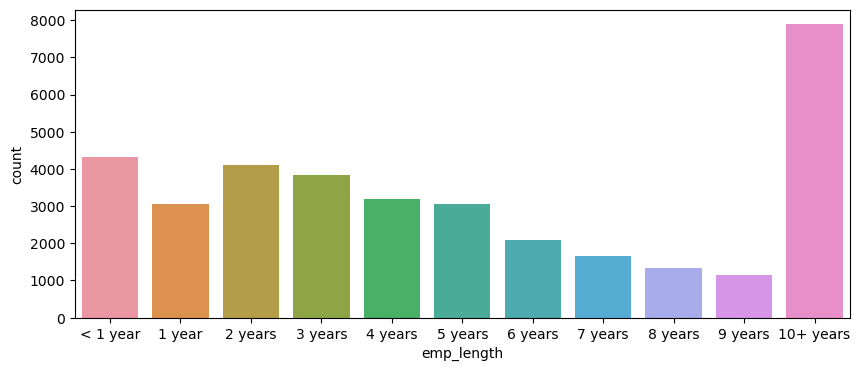

10+ years    7891
< 1 year     4330
2 years      4103
3 years      3825
4 years      3202
1 year       3047
5 years      3046
6 years      2076
7 years      1644
8 years      1344
9 years      1154
Name: emp_length, dtype: int64


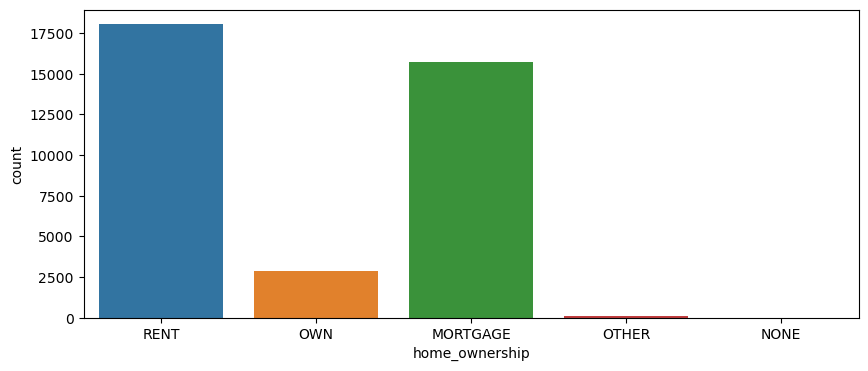

RENT        18033
MORTGAGE    15694
OWN          2853
OTHER          93
NONE            3
Name: home_ownership, dtype: int64


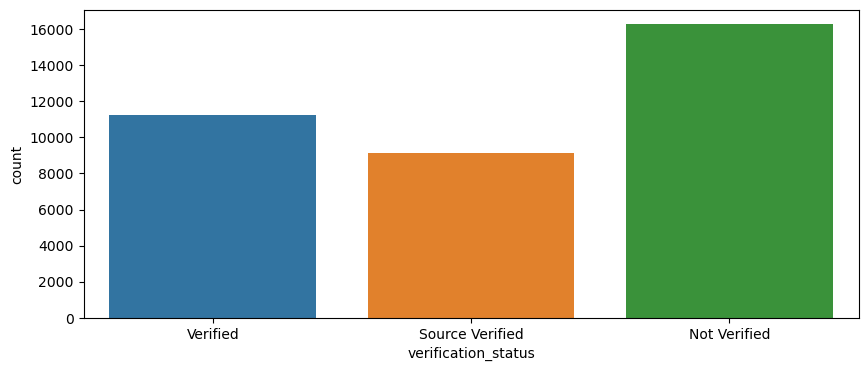

Not Verified       16286
Verified           11230
Source Verified     9160
Name: verification_status, dtype: int64


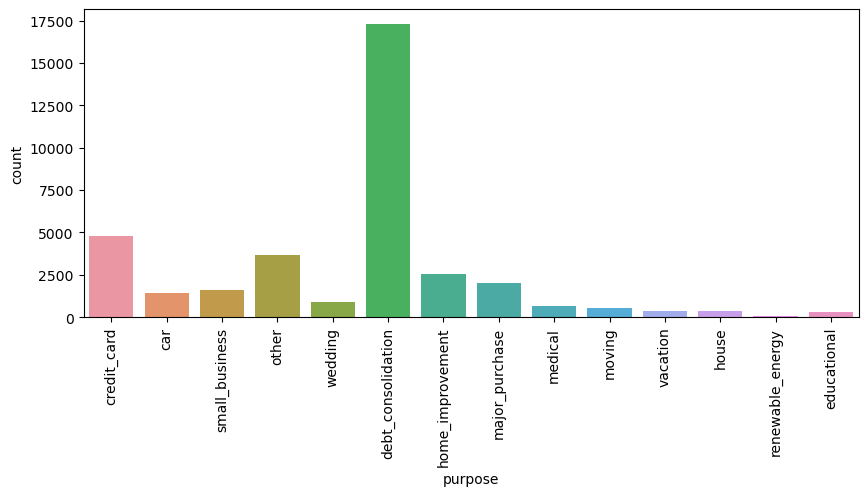

debt_consolidation    17311
credit_card            4786
other                  3701
home_improvement       2560
major_purchase         2048
small_business         1624
car                    1450
wedding                 895
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: purpose, dtype: int64


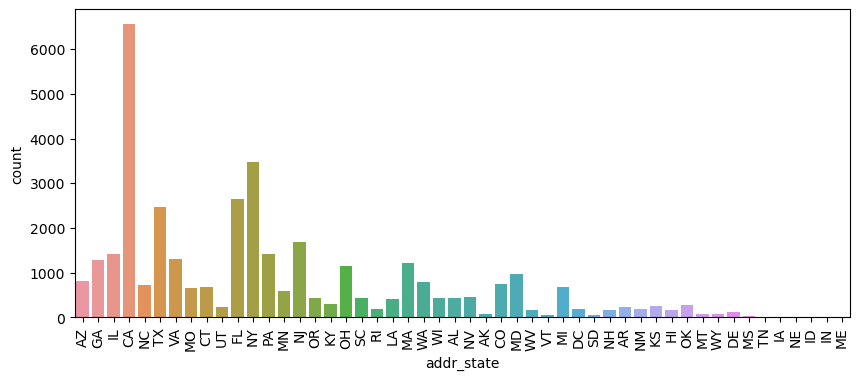

CA    6564
NY    3466
FL    2654
TX    2477
NJ    1675
PA    1422
IL    1406
VA    1309
GA    1289
MA    1211
OH    1147
MD     967
AZ     812
WA     785
CO     742
NC     719
MI     682
CT     672
MO     648
MN     588
NV     458
SC     441
OR     428
WI     424
AL     423
LA     401
KY     304
OK     281
KS     245
UT     242
AR     229
DC     195
RI     186
NM     177
WV     169
HI     160
NH     157
DE     109
MT      83
WY      80
AK      71
SD      62
VT      53
MS      19
TN      17
IN       9
IA       5
NE       5
ID       5
ME       3
Name: addr_state, dtype: int64


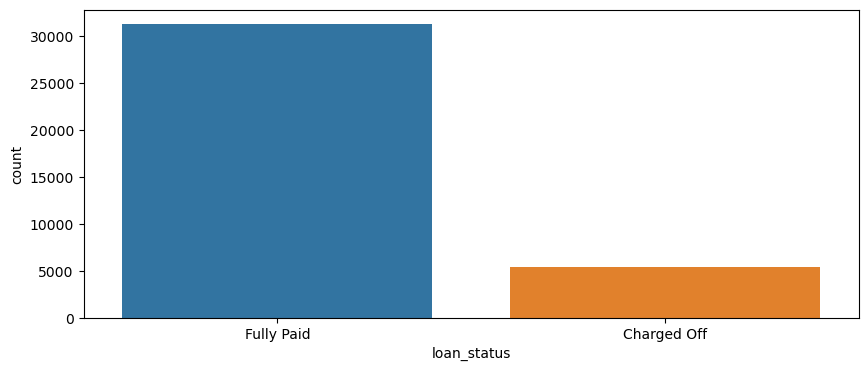

Fully Paid     31256
Charged Off     5420
Name: loan_status, dtype: int64


In [28]:
for i in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=df[i])
    if (i == 'purpose') or (i == 'addr_state'):
        plt.xticks(rotation=90)
    plt.show()
    print(df[i].value_counts())

- **Around 75% of applicants preffered to pay back loan in 36 months** <br>
- **People employed recently ie in starting 0-5 years tend to take much loans than people with mature length in jobs**<br>
- **People having their own house are less likely to take loans**<br>
- **Majority loans are taken to pay off other loans**<br>
- **Majority loans are from California, New York, Florida & Texas**<br>
- **Around 85% of loans are Fully Paid.**

<br>

### <u>Segmented Univariate Analysis</u>

In [29]:
# Based on domain selecting a few columns that might give better insights of data

con_cols_domain = ['loan_amnt', 'int_rate', 'installment', 'annual_inc']
cat_cols_domain = ['term', 'emp_length', 'home_ownership', 'verification_status', 'grade']
target_col = 'loan_status'

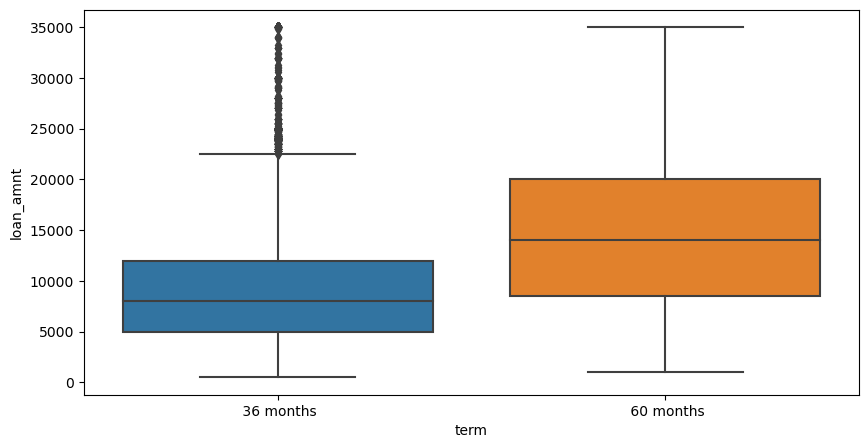

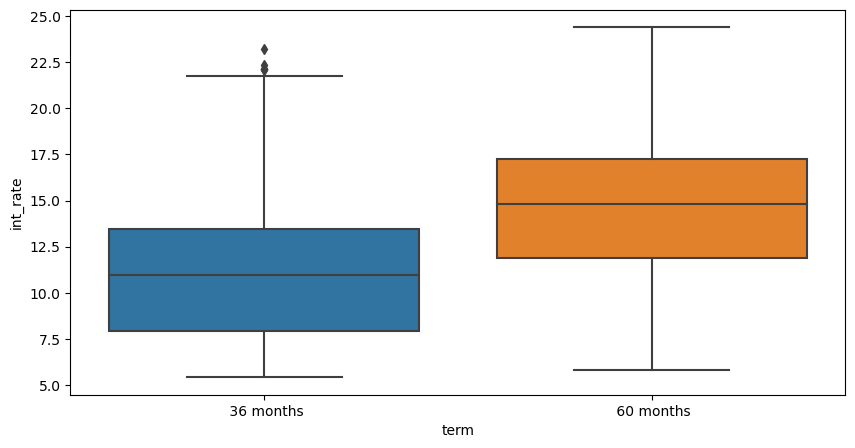

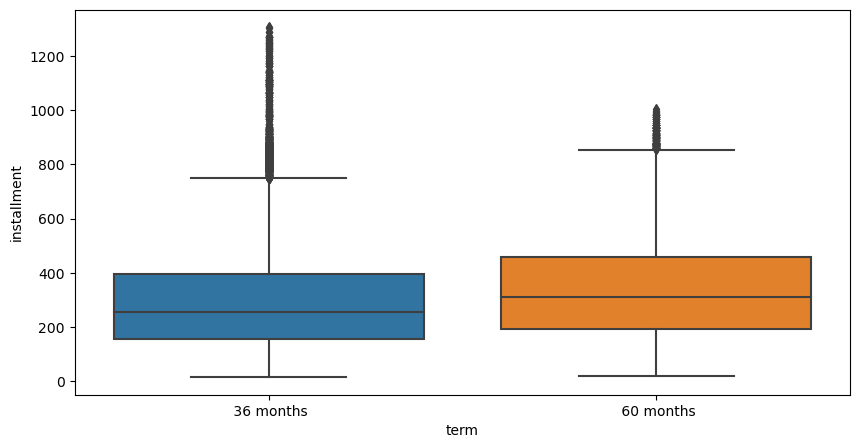

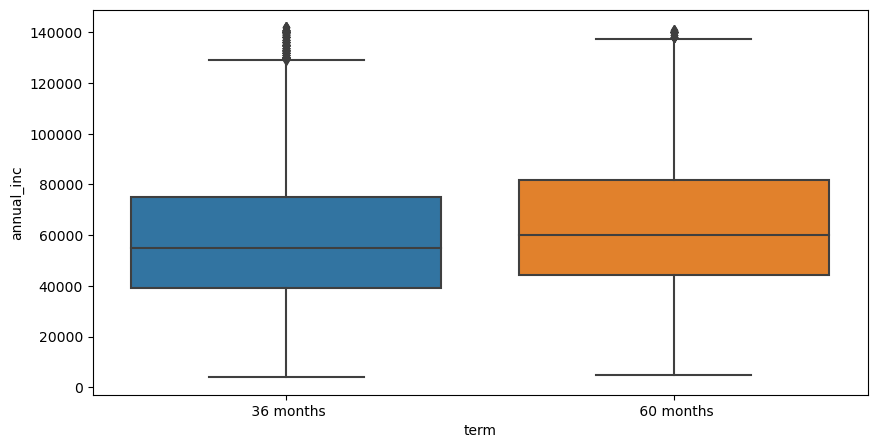

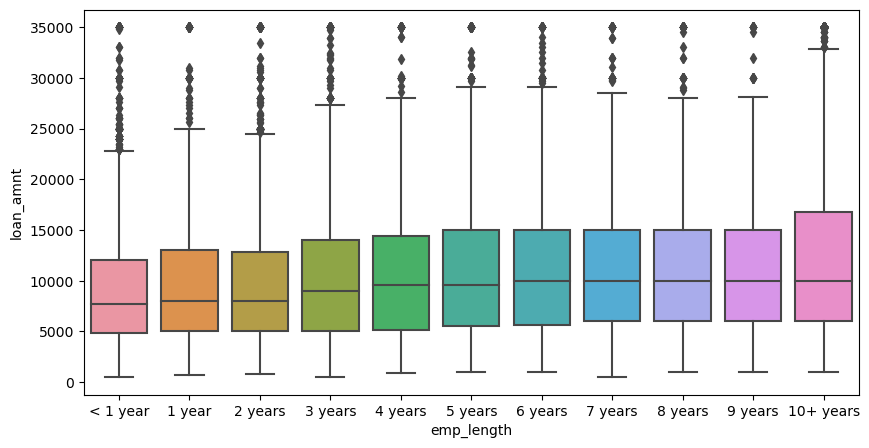

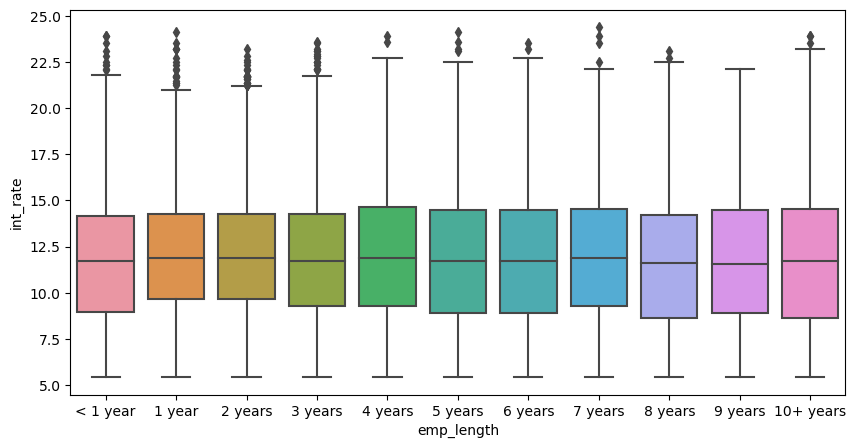

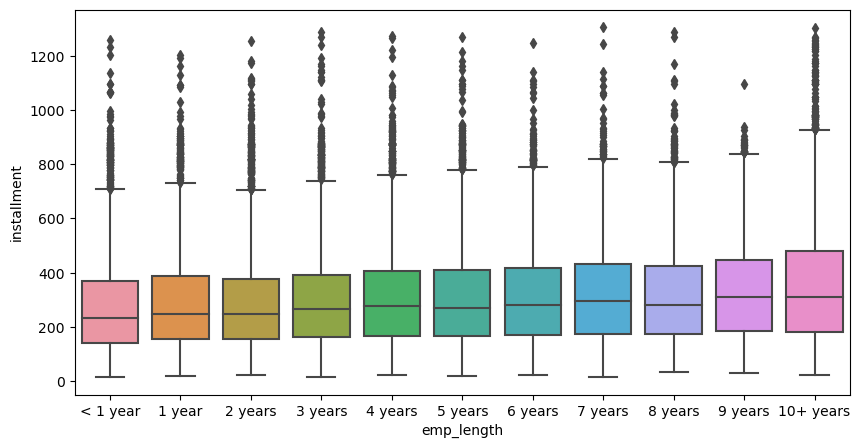

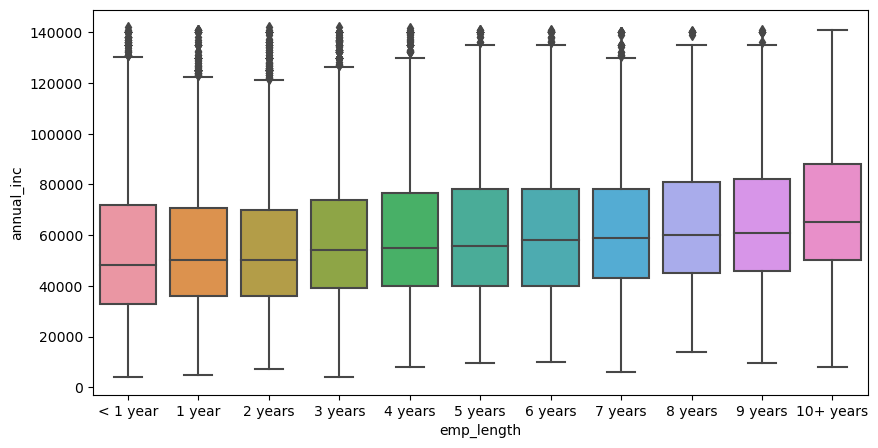

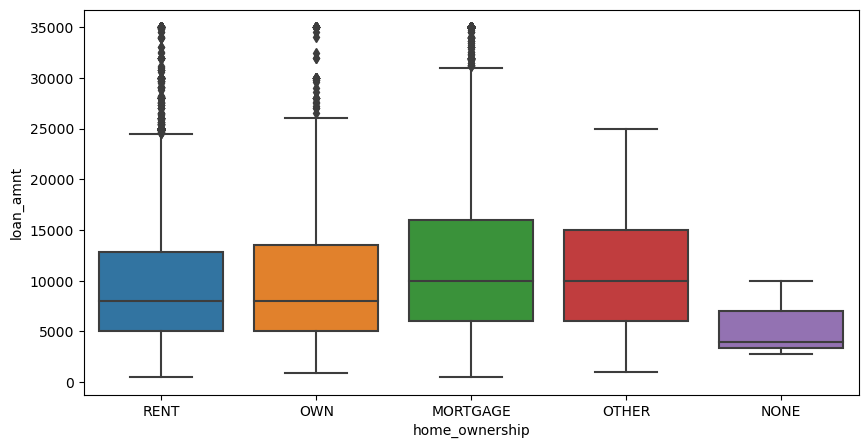

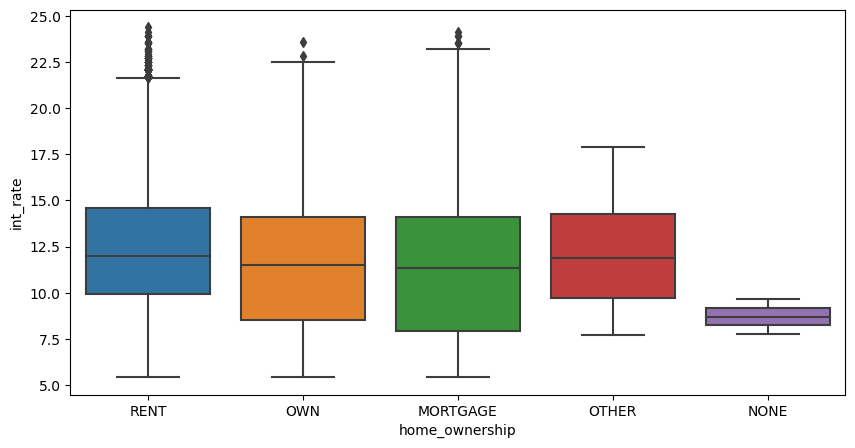

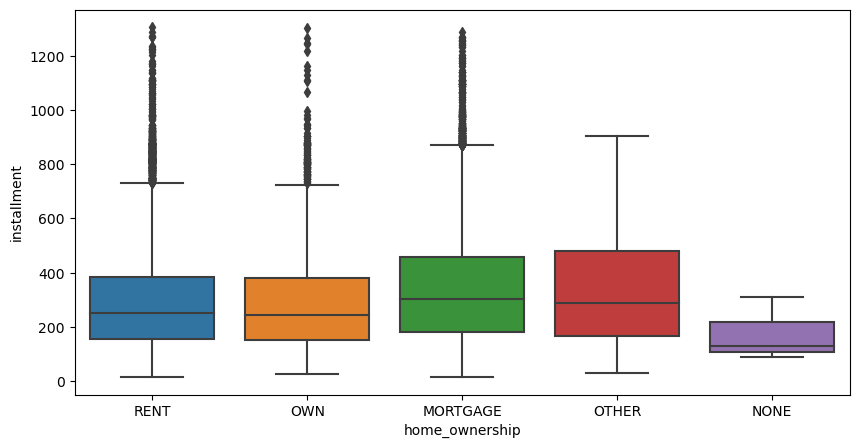

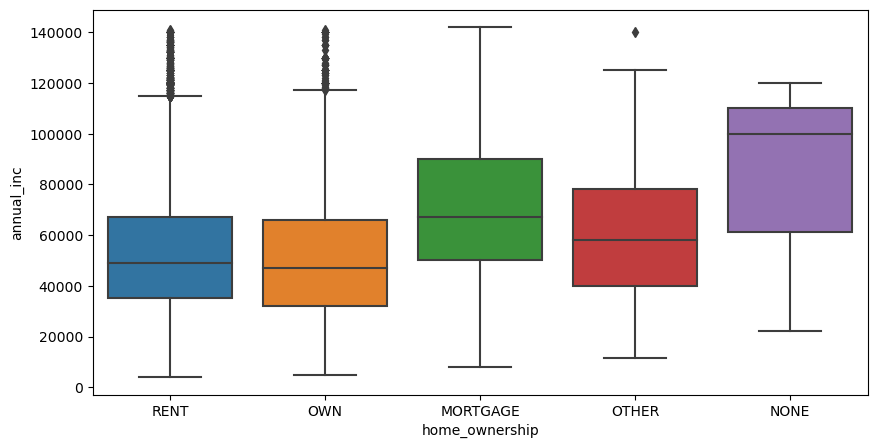

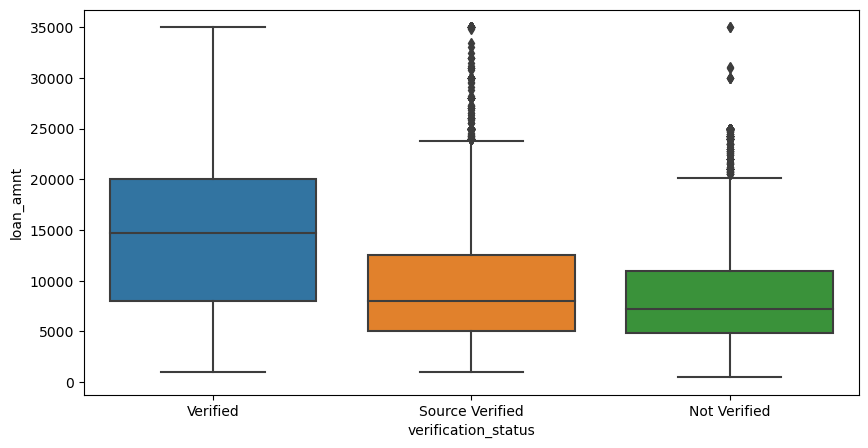

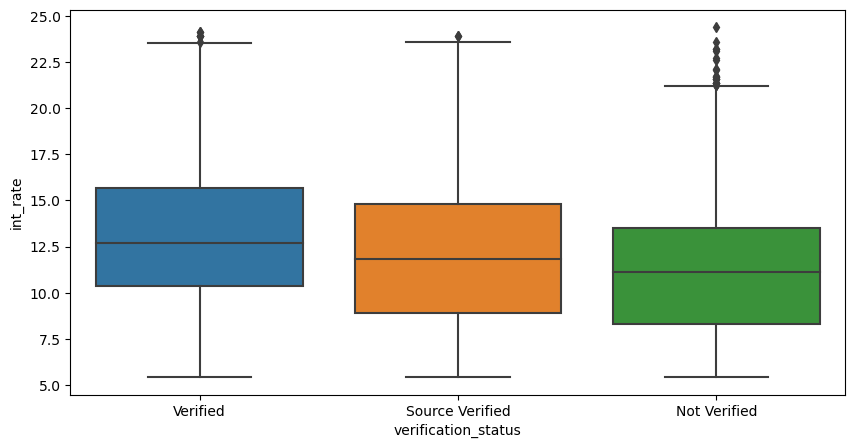

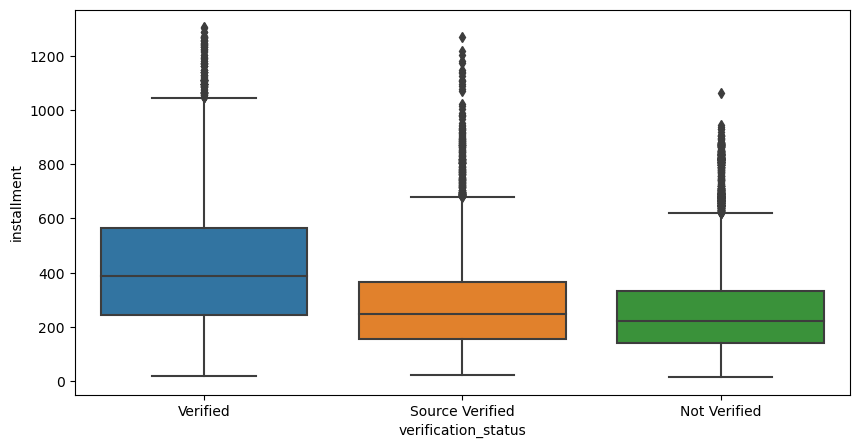

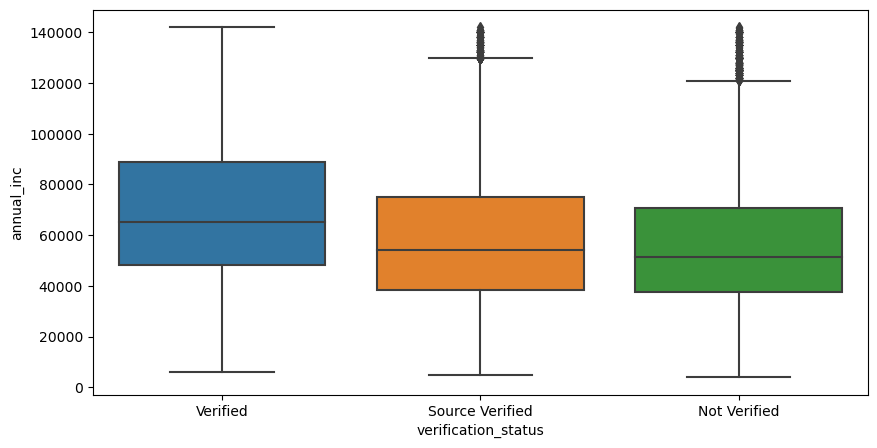

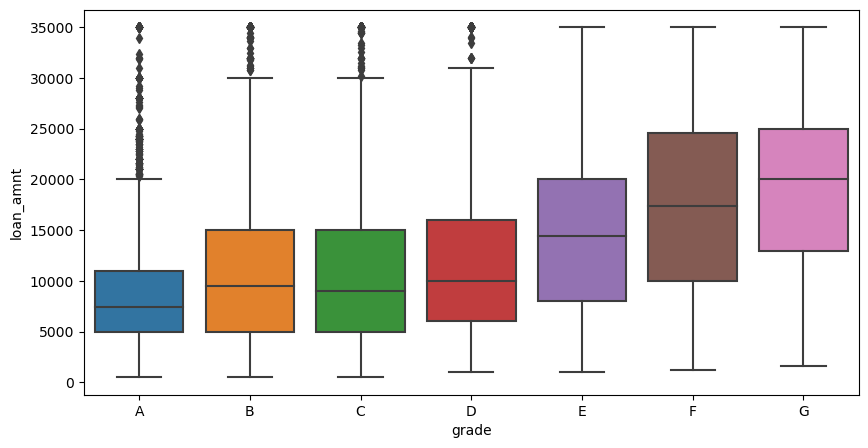

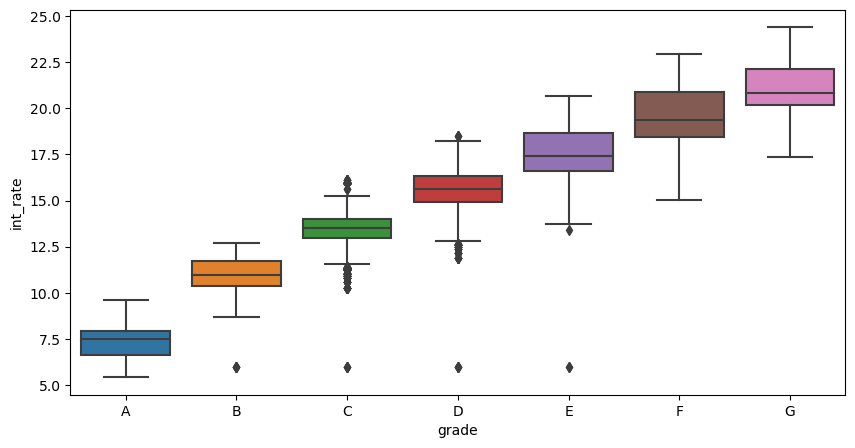

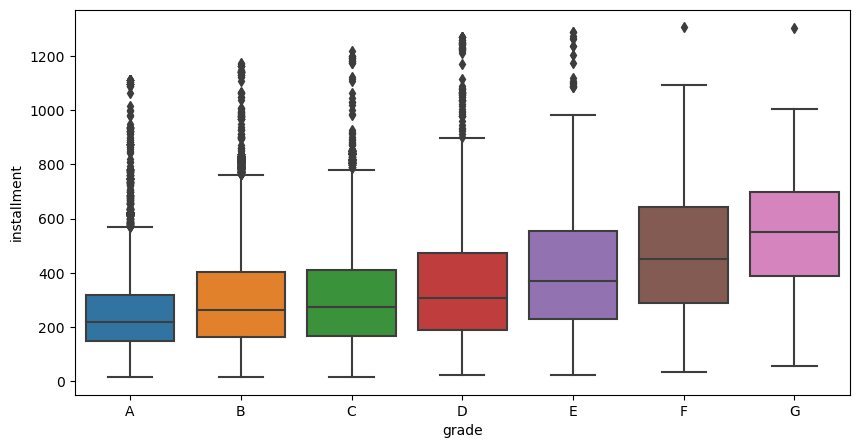

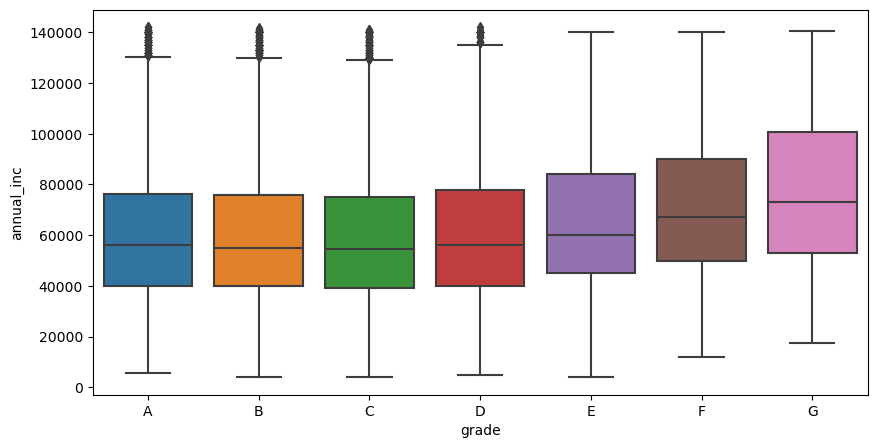

In [30]:
# Boxplots from domain based columns

for categorical in cat_cols_domain:
    for continuous in con_cols_domain:
        plt.figure(figsize=(10,5))
        sns.boxplot(x = categorical, y= continuous, data=df)
        plt.show()

- **People with higher loan amount tend to pay in higher tenure ie 60 months** <br>
- **Annual income had increase with their Employement Tenure** <br>
- **People having mortgaged house tend to have bigger loan amounts in comparison to owned house owners and rented house owners** <br>
- **People having Rented houses are less likely to get loan at lower interest rates** <br>
- **People having mortgaged houses tend to have higher annual income** <br>
- **People with verified incomes are easily given bigger loans** <br>
- **People with verified incomes get loans at higher interests** <br>
- **The rate of interest keeps increasing with grade going from A to G** <br>


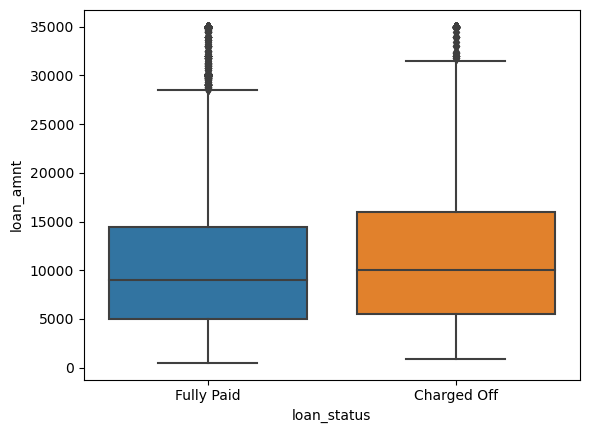

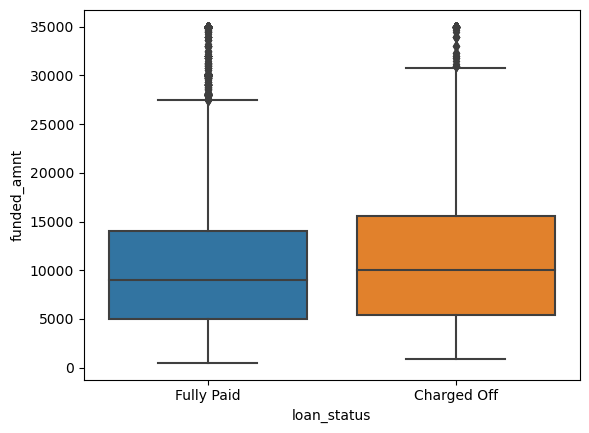

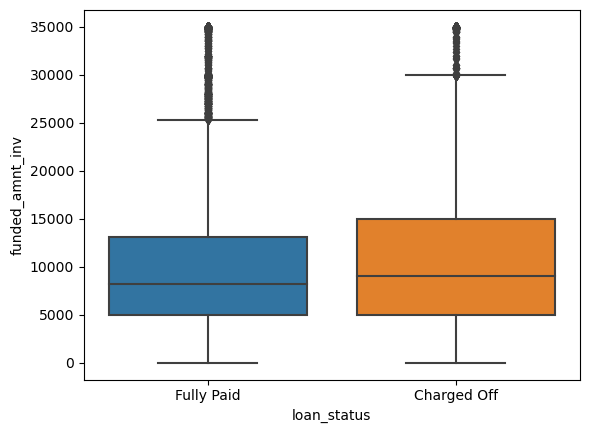

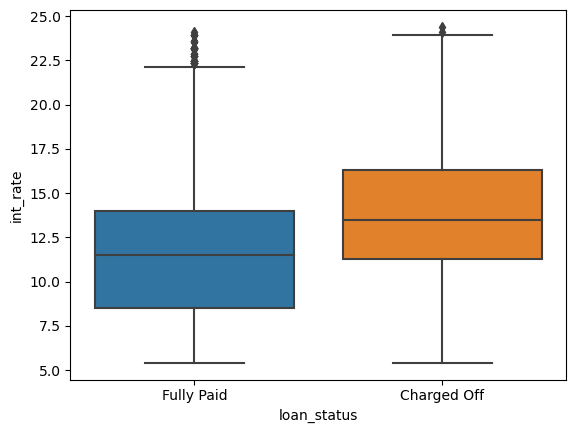

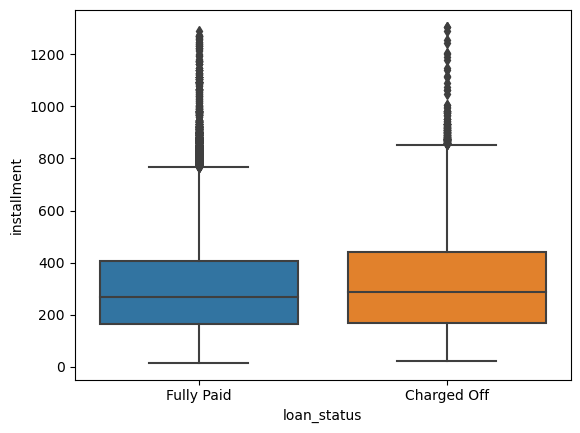

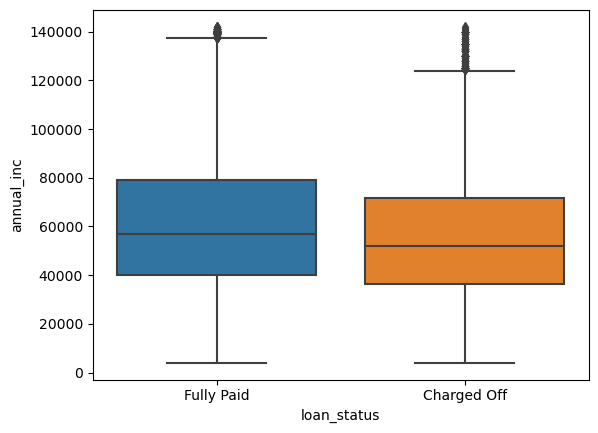

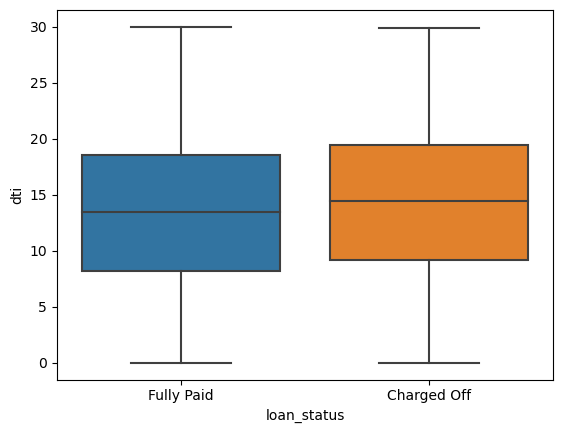

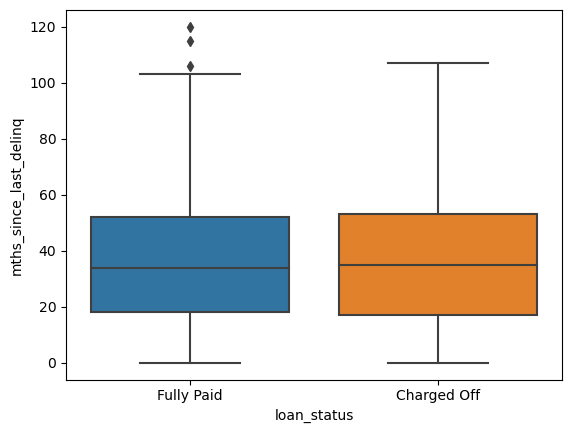

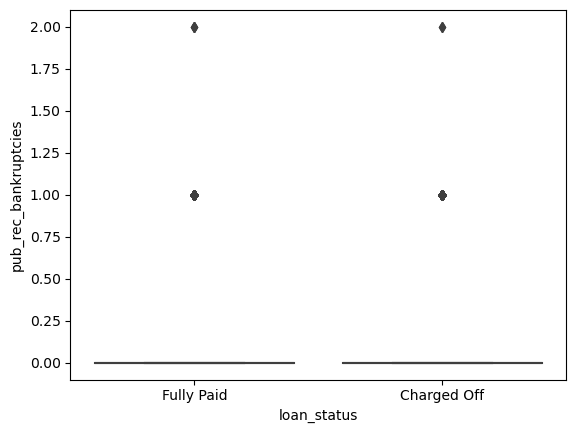

In [31]:
# Draw Barplot with "loan_status" on X-axis and all other Continuous data on Y-Axis sequencially.

for i in con_cols:
    sns.boxplot(x = target_col, y = i, data = df)
    plt.show()

#### <u>Analysis related to Problem Statement</u>

- **People who default usually have higher amount of loans in comparison to the one's who pays off** <br>
- **People having higher rate of interest tend to default on loan** <br>
- **People having higher annual income tend to fully pay the loan** <br>

In [32]:
default_figsize = plt.rcParams['figure.figsize']

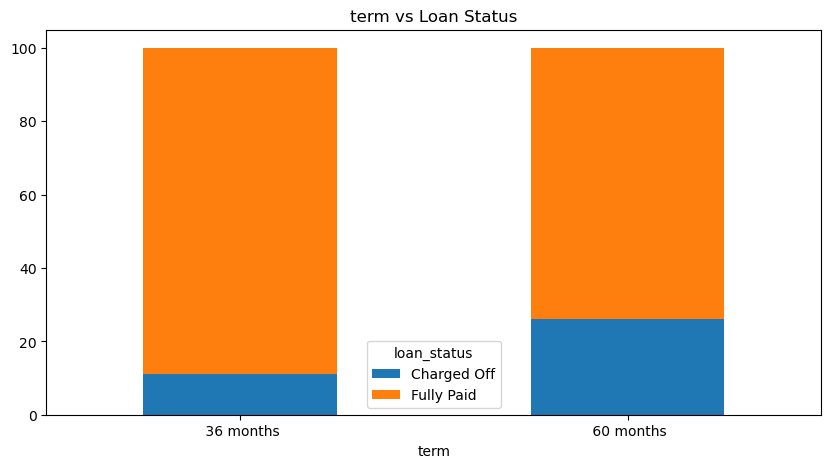

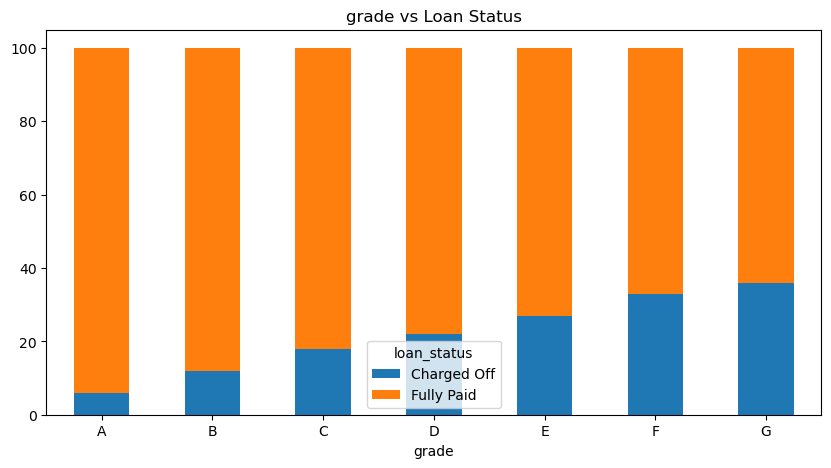

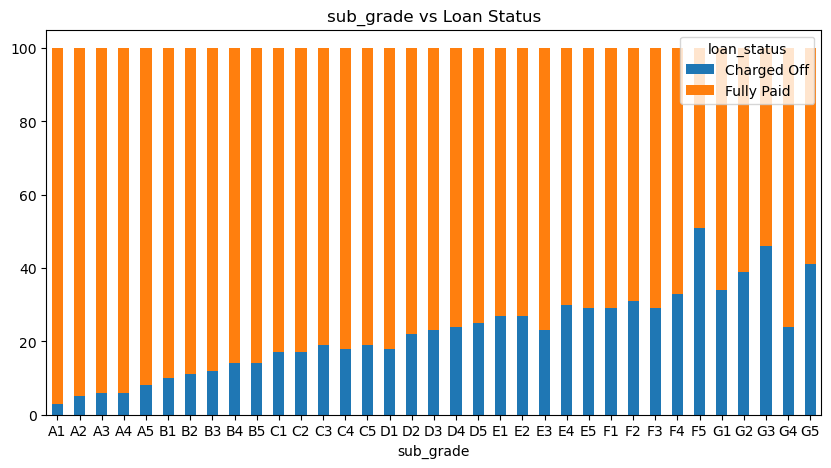

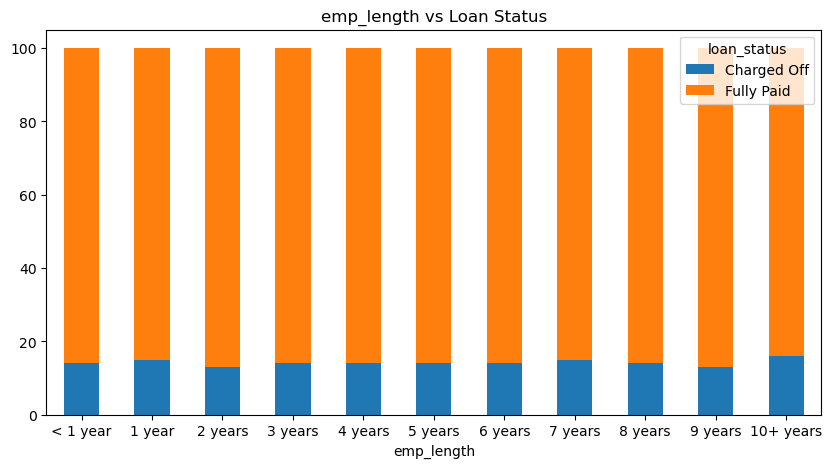

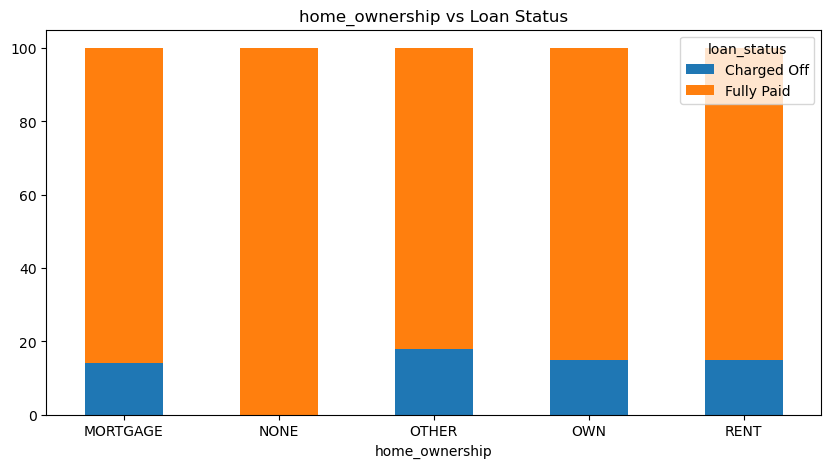

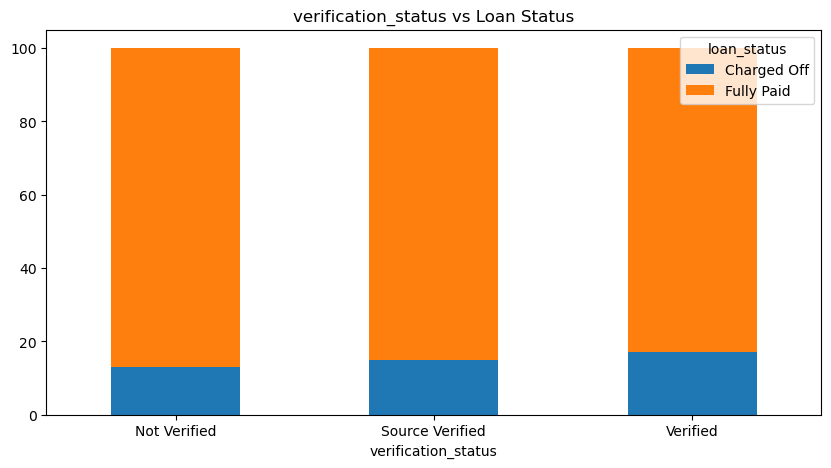

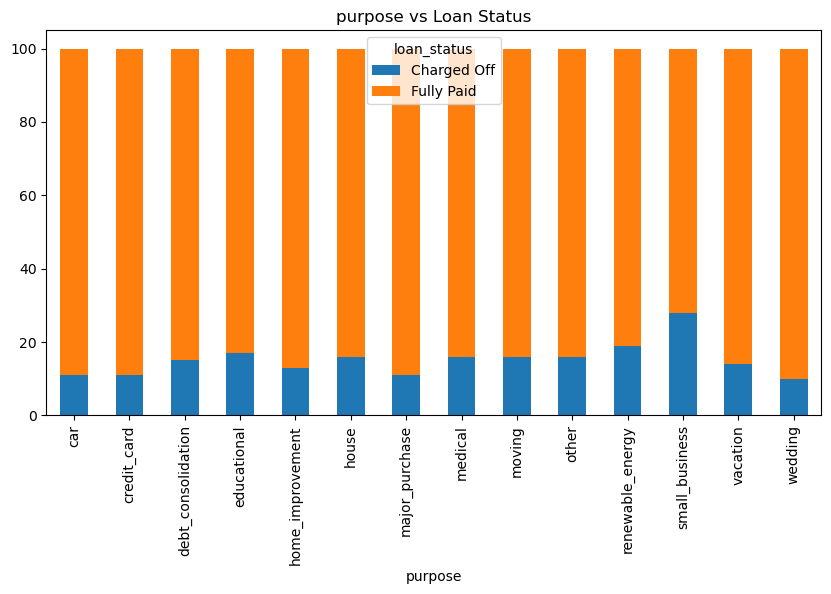

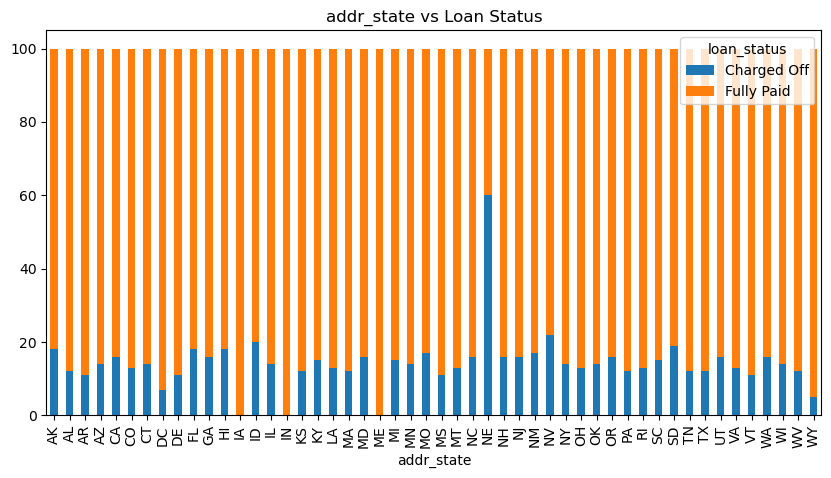

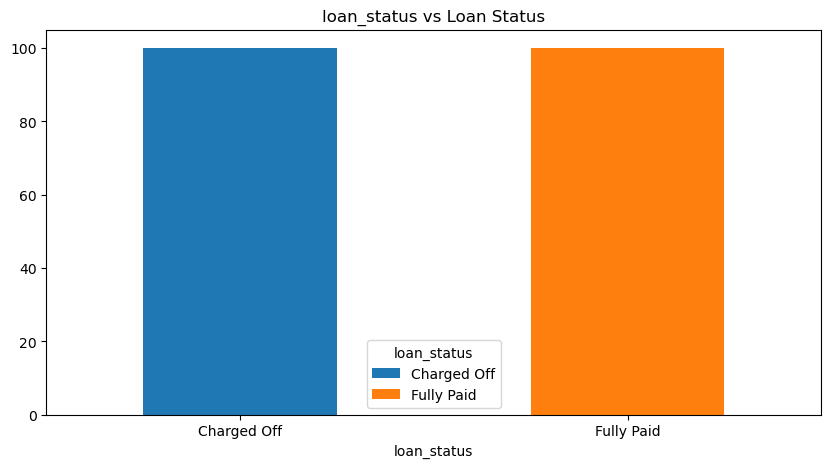

In [33]:
# Draw segmented bar plots with categorical columns on basis of loan_status

plt.rcParams['figure.figsize'] = (10, 5)

for i in cat_cols:
    df_grouped = df.groupby([i,'loan_status'])['loan_status'].count().unstack()
    df_grouped.apply(lambda x : round(x*100/x.sum()),axis=1).plot(kind='bar', stacked=True)
    plt.title(f'{i} vs Loan Status')
    if (i == 'purpose') or (i == 'addr_state'):
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)
    plt.show()

#### <u>Analysis related to Problem Statement</u>

- **People having 60 months as loan payment tenure tend to default more**<br>
- **Loans of Grade E, F & G tend to get much more defaulted, specially sub grade F5, G3 G5**<br>
- **Loans given for the purpose of Small Business, Renewable Energy & Education have higher rate of getting defaulted, whereas, loan given for Weddings has highest chances of being fully paid**<br>
- **Loans given in state of Nebraska has very high default percentages, which is because there are only 5 loans given in Nebraska and thus each default holds high percenage, therefore, can ignore this analysis.**<br>


In [34]:
plt.rcParams['figure.figsize'] = default_figsize

In [35]:
default_figsize

[6.4, 4.8]

<br>

### <u>Bivariate Analysis</u>

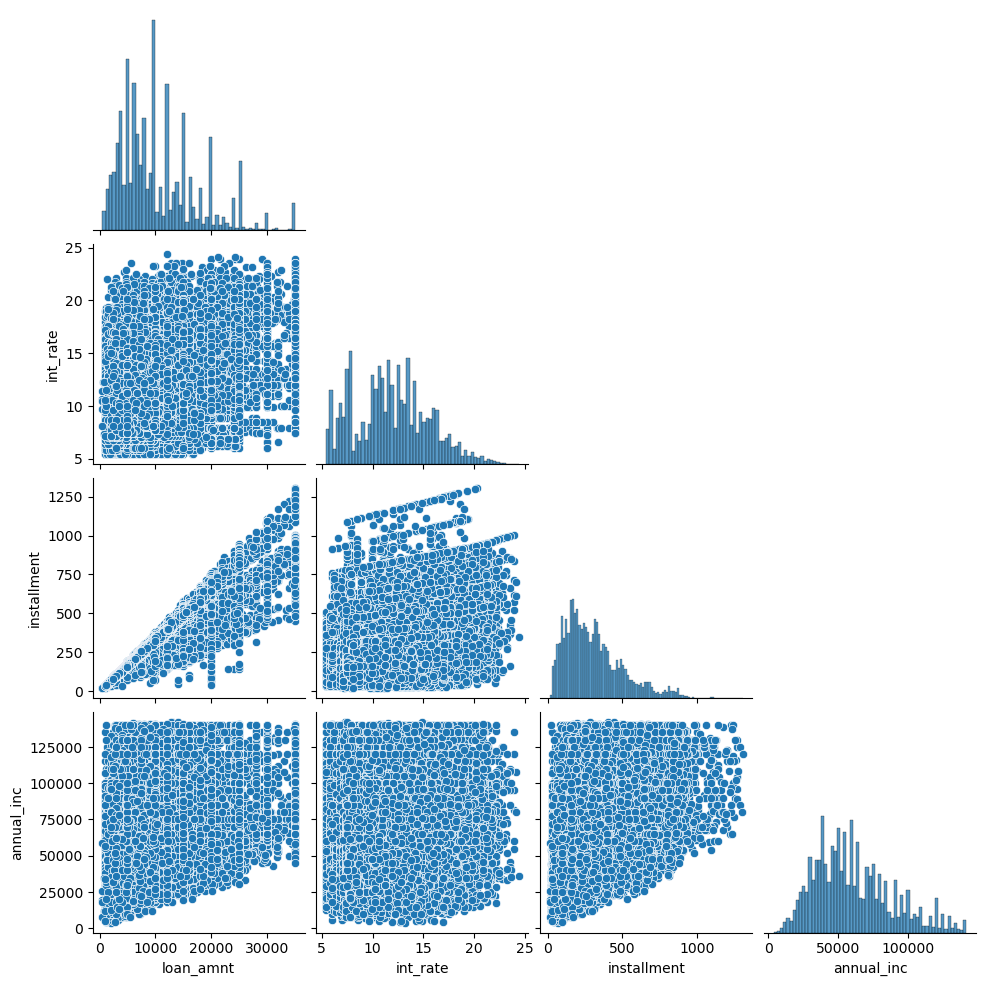

In [36]:
# Draw pairplot for all the numerical data so that we can find co-relation between them.

sns.pairplot(data=df[con_cols_domain], corner=True)

<Axes: >

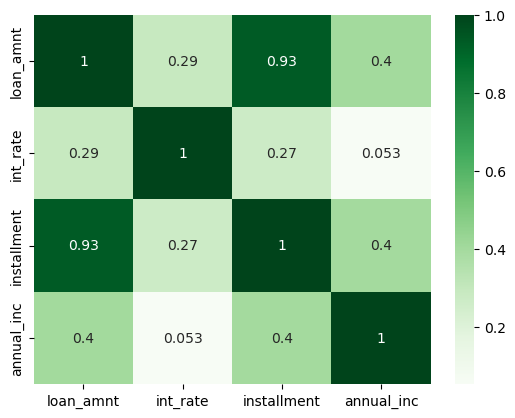

In [37]:
sns.heatmap(df[con_cols_domain].corr(),cmap="Greens", annot=True)

**- The above graphs tells that loan_amount and installment are highly co-related with each other.**

In [38]:
def Bivariate_HeatMap(x_col, y_col, x_label, y_label):
    df_grouped = df.groupby([y_col, x_col, 'loan_status'])['loan_status'].count().unstack()
    df_grouped = df_grouped.apply(lambda x : round(x * 100 / x.sum()),axis = 1)
    df_grouped.drop(columns='Fully Paid', inplace = True)
    df_unstacked = df_grouped.unstack()
    df_unstacked.columns = df_unstacked.columns.droplevel()
#     plt.figure(figsize=(10,5))
    heat_map = sns.heatmap(df_unstacked, annot = True, cbar_kws = {'label': 'Defaulters %'}, cmap = 'PuBu')
    heat_map.set(xlabel = x_label, ylabel = y_label, title =f'Defaulters % w.r.t {x_label} and {y_label}')
    plt.show()

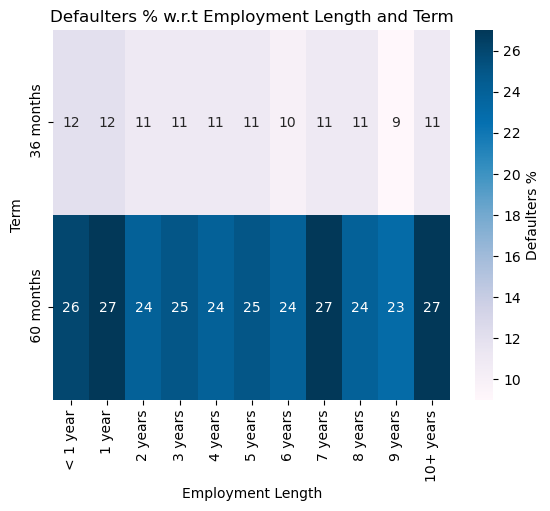

In [39]:
Bivariate_HeatMap('emp_length','term','Employment Length','Term')

**- The applicants who opted to pay in 60 months defauted more specially the one's having employment experience <1 Year, 1 Year, 7 Year and 10+ Years** 

<br>


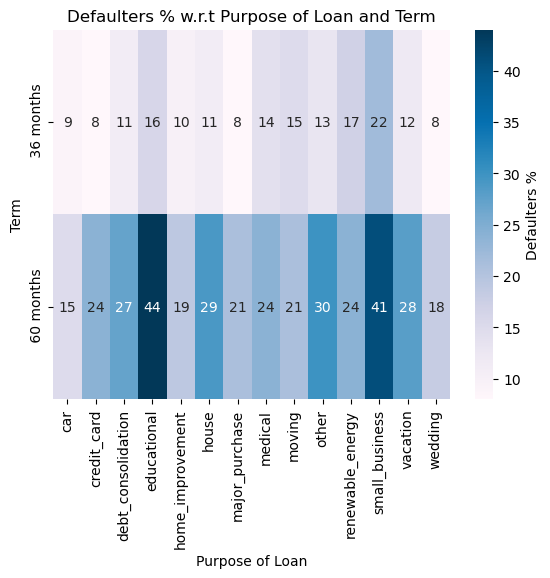

In [40]:
Bivariate_HeatMap('purpose','term','Purpose of Loan','Term')

**- People opting for 60 months loan tend to default specially if they took it for Small Business or Educational purpose.**

<br>

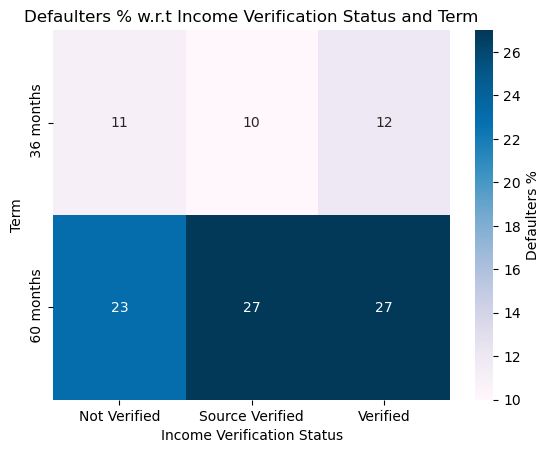

In [41]:
Bivariate_HeatMap('verification_status','term','Income Verification Status','Term')

**- Applicants who have verified incomes tend to default more, which is quite surprising and one of the reason of same could be that verified income applicants are easily given bigger loans and also at higher interest rate which tends them to default loan**

<br>

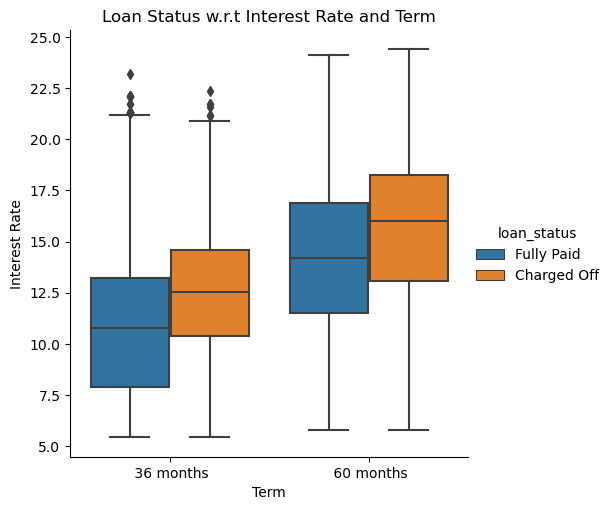

In [42]:
heat_map = sns.catplot(x='term',y='int_rate',data=df,hue='loan_status',kind='box')
heat_map.set(xlabel='Term',ylabel='Interest Rate',title='Loan Status w.r.t Interest Rate and Term')
plt.show()

**- From the above graph, it can be seen that irrelevant of the term of loan, people tend to default on loan if interest rate is high**

<br>

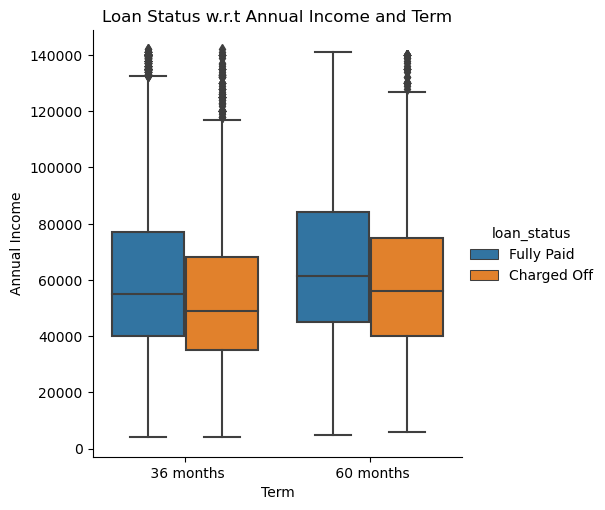

In [43]:
heat_map = sns.catplot(x='term',y='annual_inc',data=df,hue='loan_status',kind='box')
heat_map.set(xlabel='Term',ylabel='Annual Income',title='Loan Status w.r.t Annual Income and Term')
plt.show()

**- People having lower income and opted for 60 months tenure tend much more to default loan**

<br>

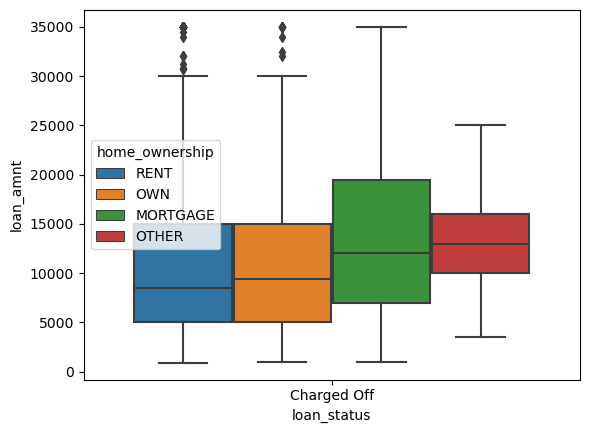

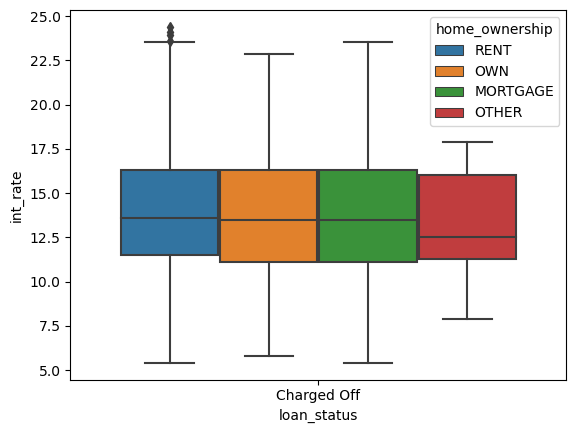

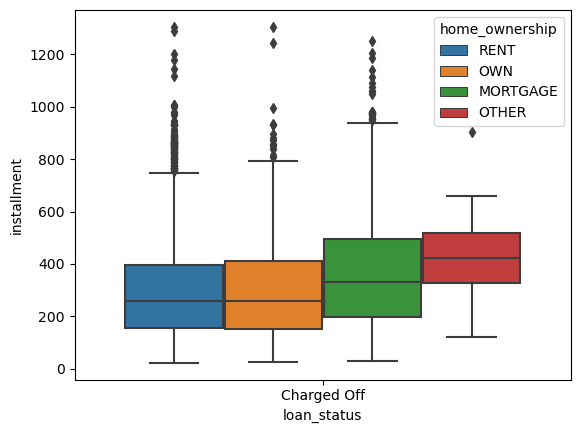

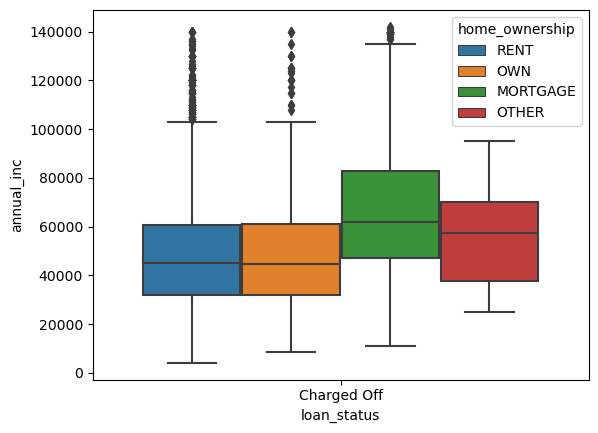

In [44]:
defaulted_df = df[df.loan_status != 'Fully Paid']
for con_col in ["loan_amnt","int_rate","installment","annual_inc"]:
    boxchart = sns.boxplot(x = 'loan_status',y = con_col, data = defaulted_df, hue="home_ownership")
    boxchart.set_xticklabels(labels=defaulted_df["loan_status"].unique())
    plt.show()

- **Applicants having Mortgage home ownership is and having income between 60 to 70 k and have high amount of loan are likely to get default.**

<br>

### <u>Derived Metrics</u>

> Will create bins for ```annual_inc, int_rate, loan_amt``` in category like ```low, medium, high, very high``` to do further analysis as these columns contain high relevance as per domain.


In [45]:
# function to bin columns into low, medium, high & very high

def col_to_bins(col_name, new_col_name):
    df[new_col_name] = pd.qcut(df[col_name], q=4, labels=['low','medium','high','very high'])


In [46]:
col_to_bins('annual_inc','annual_inc_bins')
col_to_bins('int_rate','int_rate_bins')
col_to_bins('loan_amnt','loan_amnt_bins')

In [47]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status,loan_status,purpose,addr_state,dti,mths_since_last_delinq,pub_rec_bankruptcies,annual_inc_bins,int_rate_bins,loan_amnt_bins
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Verified,Fully Paid,credit_card,AZ,27.65,NaN,0.0,low,medium,low
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Source Verified,Charged Off,car,GA,1.00,NaN,0.0,low,very high,low
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,Not Verified,Fully Paid,small_business,IL,8.72,NaN,0.0,low,very high,low
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Source Verified,Fully Paid,other,CA,20.00,35.0,0.0,medium,high,high
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,Source Verified,Fully Paid,wedding,AZ,11.20,NaN,0.0,low,low,low


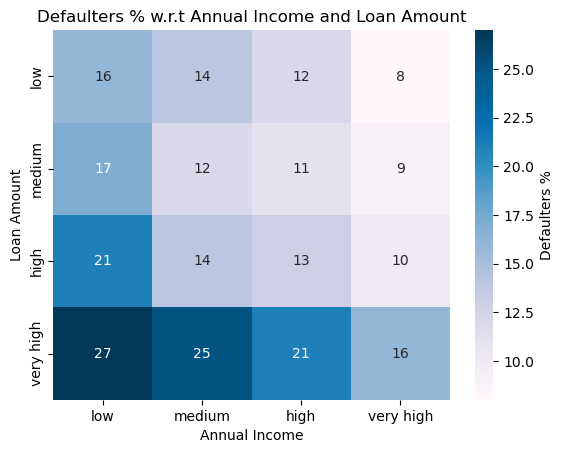

In [48]:
Bivariate_HeatMap('annual_inc_bins','loan_amnt_bins','Annual Income','Loan Amount')

- **As per the heatmap, an applicant defaults a loan when <u>loan amount is very high</u> no matter income earned by applicant, and also when an applicant has a <u>low annual income</u>.**


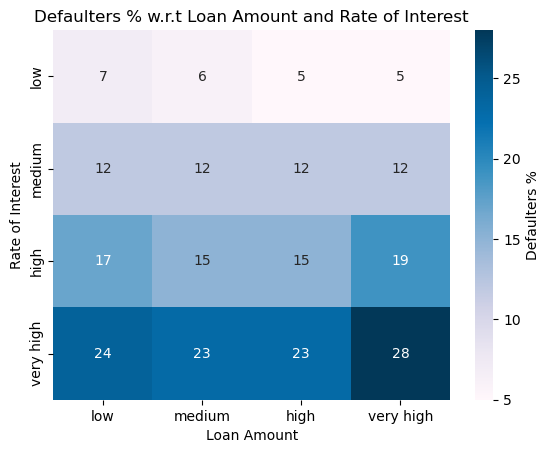

In [49]:
Bivariate_HeatMap('loan_amnt_bins','int_rate_bins','Loan Amount','Rate of Interest')

- **A Loan is likely to be defaulted if it has <u>high or very high interest rates</u> especially when <u>loan amount is also very high</u>.**

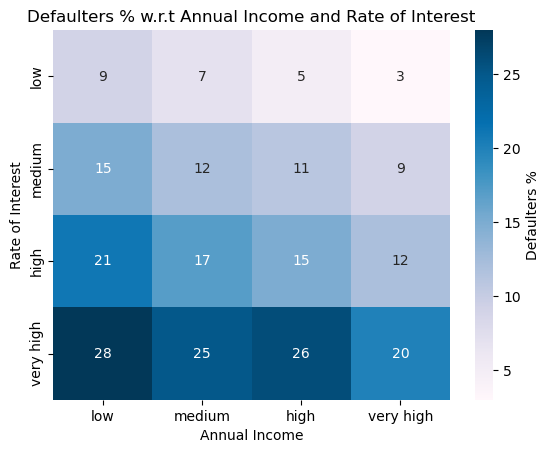

In [50]:
Bivariate_HeatMap('annual_inc_bins','int_rate_bins','Annual Income','Rate of Interest')

- **The % of <u>defaulters keeps incresing with increasing Rate of Interest</u> and <u>defaulters also increases with decrease in annual income.</u>**

<br><br><br>


## <u>Summary</u>
- **Loan amount has spikes in multiples of 5000, ie, people prefer taking loan in multiple of 5000's**<br>
- **Around 75% of applicants preffered to pay back loan in 36 months** <br>
- **People employed recently ie in starting 0-5 years tend to take much loans than people with mature length in jobs**<br>
- **Majority loans are taken to pay off other loans**<br>
- **People with higher loan amount tend to pay in higher tenure ie 60 months** <br>
- **Annual income had increase with their Employement Tenure** <br>
- **People having mortgaged house tend to have bigger loan amounts in comparison to owned house owners and rented house owners** <br>
- **People having Rented houses are less likely to get loan at lower interest rates** <br>
- **People having mortgaged houses tend to have higher annual income** <br>
- **People with verified incomes are easily given bigger loans** <br>
- **People with verified incomes get loans at higher interests** <br>
- **The rate of interest keeps increasing with grade going from A to G** <br>


## <u>Analysis related to Problem Statement</u>

- **People who default usually have higher <u>amount of loans</u> in comparison to the one's who pays off** <br>
- **People having higher <u>rate of interest</u> tend to default on loan ie, on average more than 11-12%** <br>
- **People having higher <u>annual income</u> tend to fully pay the loan** <br>
- **People having 60 months as loan <u>payment tenure</u> tend to default more**<br>
- **Loans of <u>Grade</u> E, F & G tend to get much more defaulted, specially sub grade F5, G3 G5**<br>
- **Loans given for the <u>purpose</u> of Small Business, Renewable Energy & Education have higher rate of getting defaulted, whereas, loan given for Weddings has highest chances of being fully paid**<br>
- **People opting for 60 months loan tend to default specially if they took it for Small Business or Educational purpose.**<br>
- **Applicants who have <u>verified incomes</u> tend to default more, which is quite surprising and one of the reason of same could be that verified income applicants are easily given bigger loans and also at higher interest rate which tends them to default loan**<br>
- **From the above graph, it can be seen that irrelevant of the term of loan, people tend to default on loan if interest rate is high**<br>
- **People having lower income and opted for 60 months tenure tend much more to default loan**


<p style='text-align: right;'> -- Lending club Case Study Ruchir Dhingra & Tanupriya Chourasia <br>Thank You</p>